In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 22

# Análise de inscritos para o ENEM 2019

In [3]:
#seleção de colunas para analise
col = ['CO_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_ESCOLA','NU_IDADE','Q006']

In [4]:
#importação das colunas
DadosInsc = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=";", usecols=col)

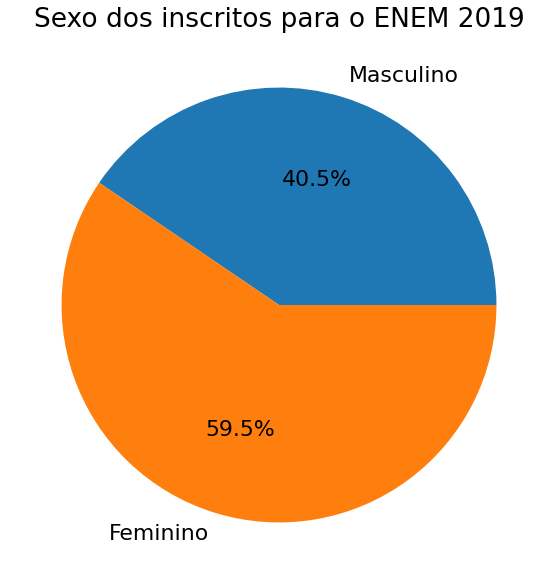

In [5]:
#contando os inscritos de sexo masculino e feminino
masc = (DadosInsc['TP_SEXO'] == 'M').sum()
fem = (DadosInsc['TP_SEXO'] == 'F').sum()

plt.subplot(aspect=1, title='Sexo dos inscritos para o ENEM 2019')
plt.pie([masc,fem], labels=['Masculino','Feminino'],autopct='%1.1f%%')
plt.show()

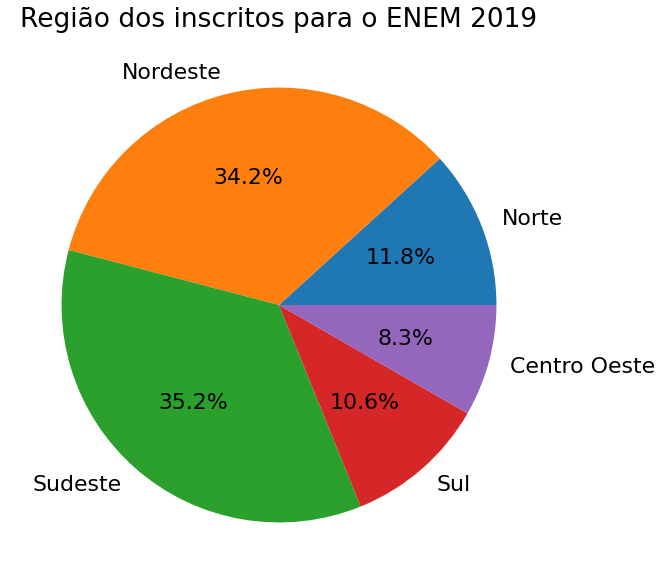

In [6]:
#contando os inscritos de cada região do país
N = (DadosInsc['CO_UF_RESIDENCIA'] < 20).sum()
NE = ( (DadosInsc['CO_UF_RESIDENCIA'] >= 20) & (DadosInsc['CO_UF_RESIDENCIA'] <30)).sum()
SE = ( (DadosInsc['CO_UF_RESIDENCIA'] >= 30) & (DadosInsc['CO_UF_RESIDENCIA'] <40)).sum()
S = ( (DadosInsc['CO_UF_RESIDENCIA'] >= 40) & (DadosInsc['CO_UF_RESIDENCIA'] <50)).sum()
CO = (DadosInsc['CO_UF_RESIDENCIA'] >= 50).sum()

plt.subplot(aspect=1, title='Região dos inscritos para o ENEM 2019')
plt.pie([N, NE, SE, S, CO], labels=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro Oeste'],autopct='%1.1f%%')
plt.show()

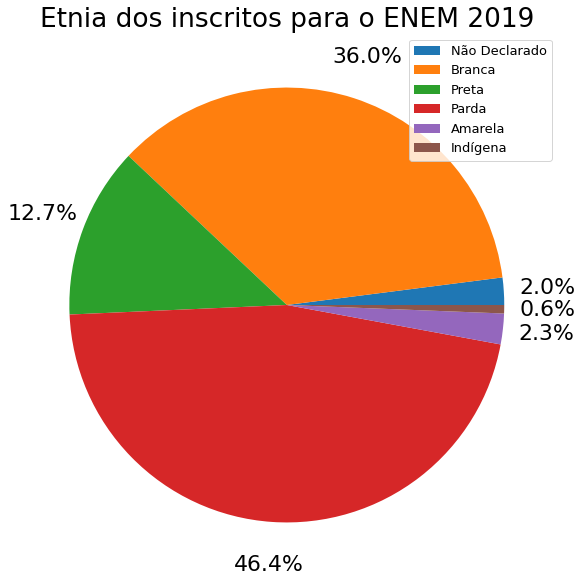

In [7]:
#separando os inscritos por etnia
nao = (DadosInsc['TP_COR_RACA'] == 0).sum()
branca = (DadosInsc['TP_COR_RACA'] == 1).sum()
preta = (DadosInsc['TP_COR_RACA'] == 2).sum()
parda = (DadosInsc['TP_COR_RACA'] == 3).sum()
amarela = (DadosInsc['TP_COR_RACA'] == 4).sum()
indigena = (DadosInsc['TP_COR_RACA'] == 5).sum()

plt.subplot(aspect=1, title='Etnia dos inscritos para o ENEM 2019')
a = plt.pie([nao, branca, preta, parda, amarela, indigena], autopct='%1.1f%%', pctdistance=1.2)
plt.legend(['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'], loc = 'upper right', fontsize = 13)
plt.show()

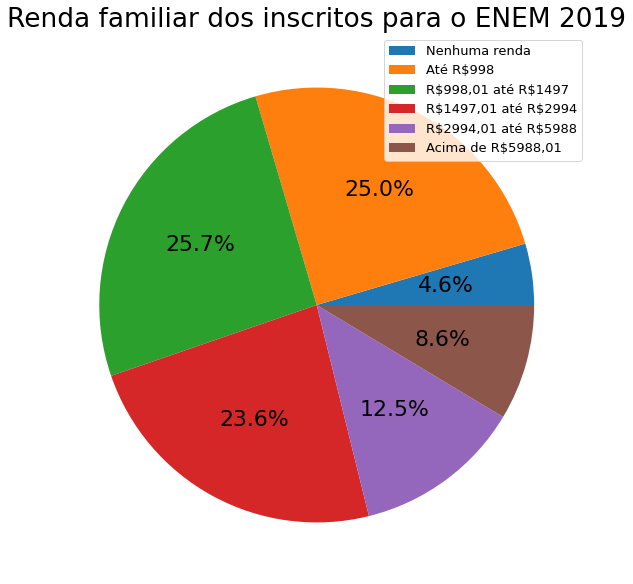

In [74]:
#separando os inscritos por renda familiar
A = (DadosInsc['Q006'] == 'A').sum() #nenhuma renda
B = (DadosInsc['Q006'] == 'B').sum() #ate 998
C = (DadosInsc['Q006'] == 'C').sum() #998 a 1497
D = ( (DadosInsc['Q006'] == 'D') | (DadosInsc['Q006'] == 'E') | (DadosInsc['Q006'] == 'F') ).sum() #1497 a 2994
G = ( (DadosInsc['Q006'] == 'G') | (DadosInsc['Q006'] == 'H') | (DadosInsc['Q006'] == 'I') ).sum() #2994 a 5988
J = ( (DadosInsc['Q006'] == 'J') | (DadosInsc['Q006'] == 'K') | (DadosInsc['Q006'] == 'L') |
     (DadosInsc['Q006'] == 'M') | (DadosInsc['Q006'] == 'N') | (DadosInsc['Q006'] == 'O') |
     (DadosInsc['Q006'] == 'P') | (DadosInsc['Q006'] == 'Q') ).sum() #acima 5988

plt.subplot(aspect=1, title='Renda familiar dos inscritos para o ENEM 2019')
plt.pie([A, B, C, D, G, J], autopct='%1.1f%%')
plt.legend(['Nenhuma renda' ,
            'Até R\$998' ,
            'R\$998,01 até R\$1497',
            'R\$1497,01 até R\$2994',
            'R\$2994,01 até R\$5988',
            'Acima de R\$5988,01'],
           loc = 'upper right', fontsize = 13)
plt.show()

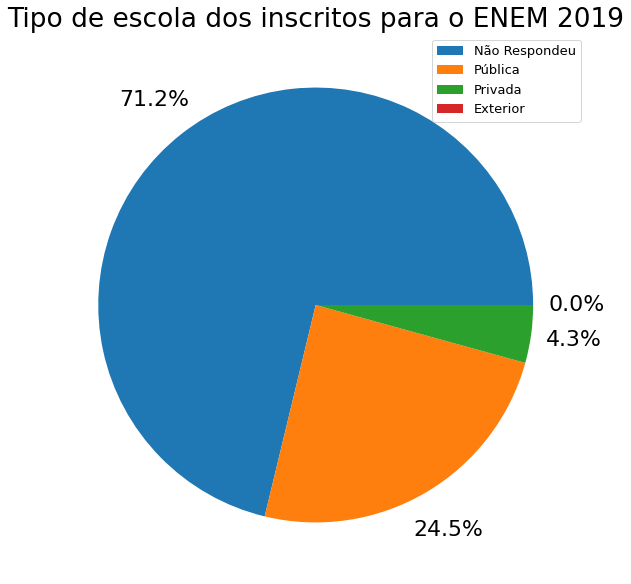

In [9]:
#tipo de escola
naorespondeu = (DadosInsc['TP_ESCOLA'] == 1).sum()
publica = (DadosInsc['TP_ESCOLA'] == 2).sum()
privada = (DadosInsc['TP_ESCOLA'] == 3).sum()
exterior = (DadosInsc['TP_ESCOLA'] == 4).sum()

plt.subplot(aspect=1, title='Tipo de escola dos inscritos para o ENEM 2019')
plt.pie([naorespondeu, publica, privada, exterior], autopct='%1.1f%%', pctdistance=1.2)
plt.legend(['Não Respondeu', 'Pública', 'Privada', 'Exterior'], loc = 'upper right', fontsize = 13)
plt.show()

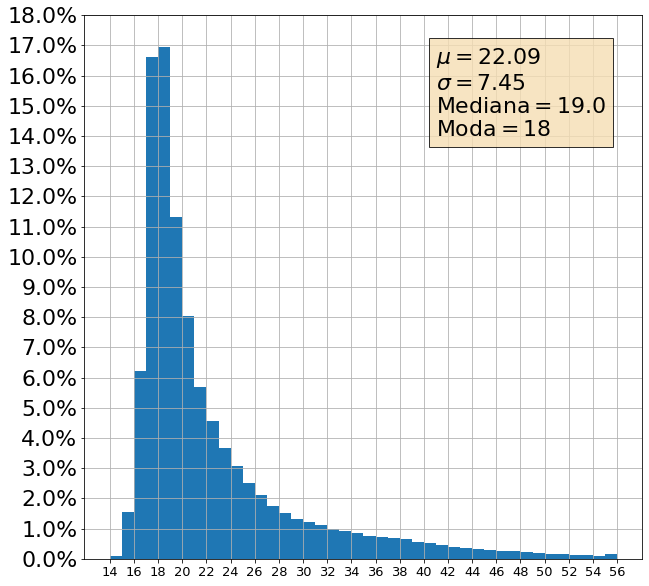

In [72]:
#idade
idade = DadosInsc['NU_IDADE']

plt.hist(idade, bins = 42, range=[14,56])
#definindo a escala no eixo y como porcentagem com o numero de inscritos como 100%
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(idade)))
#definindo os ticks em y como valores de porcentagem
plt.yticks(ticks=(np.arange(0,0.19,0.01))*len(idade))
plt.xticks(ticks=np.arange(14,58,2),fontsize=13)
#informações para o texto no gráfico
texto = (
    r'$\mu=%.2f$' % (np.mean(idade))+'\n'+
    r'$\sigma=%.2f$' % (np.std(idade))+'\n'+
    r'$\mathrm{Mediana}=%.1f$' % (np.median(idade))+'\n'+
    r'$\mathrm{Moda}=%.0f$' % (stats.mode(idade)[0])
        )
plt.text(41,0.14*len(idade),texto,bbox=dict(boxstyle='square', facecolor='wheat', alpha=0.8))
plt.xlabel('Idade')
plt.ylabel('Porcentagem do numero de inscritos')
plt.grid()
plt.show()

# Análise de desempenho dos participantes do ENEM 2019
Somente participantes que fizeram todas as provas e não entregaram a redação em branco

In [3]:
#seleção de colunas

In [4]:
col2 = ['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_ESCOLA','NU_IDADE','Q006','TP_PRESENCA_CN','TP_PRESENCA_CH'
        ,'TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT'
        ,'TP_STATUS_REDACAO','NU_NOTA_REDACAO']

In [5]:
DadosPart = pd.read_csv('Dataset/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv', sep=";", usecols=col2)

In [6]:
#selecionando somente os presentes em todas as provas e que não deixaram a redação em branco
DadosPart = DadosPart[(DadosPart['TP_PRESENCA_CN'] == 1) & (DadosPart['TP_PRESENCA_CH'] == 1) & 
                     (DadosPart['TP_PRESENCA_LC'] == 1) & (DadosPart['TP_PRESENCA_MT'] == 1) &
                     (DadosPart['TP_STATUS_REDACAO'] != 4) & ((DadosPart['TP_STATUS_REDACAO'].notnull()))]

#retirando colunas desnecessárias
DadosPart = DadosPart.drop(['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC',
                            'TP_PRESENCA_MT','TP_STATUS_REDACAO'], axis=1)

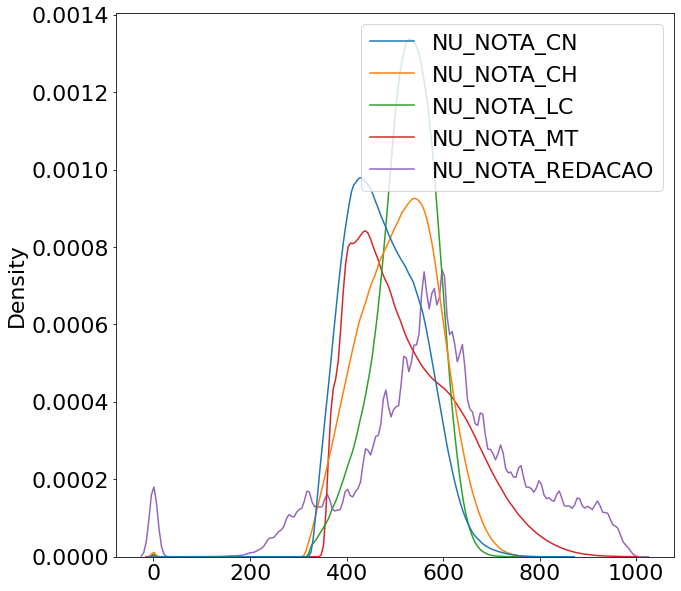

In [7]:
#distribuição de notas gerais
nota_cn = DadosPart['NU_NOTA_CN']
nota_ch = DadosPart['NU_NOTA_CH']
nota_lc = DadosPart['NU_NOTA_LC']
nota_mt = DadosPart['NU_NOTA_MT']
nota_rd = DadosPart['NU_NOTA_REDACAO']

# sns.histplot([nota_cn, nota_ch, nota_lc, nota_mt, nota_rd], bins=10, kde = True )

sns.kdeplot(data=[nota_cn, nota_ch, nota_lc, nota_mt, nota_rd])
# plt.legend(['Ciências Naturais','Ciências Humanas', 'Linguagens', 'Matemática', 'Redação'])
plt.show()